In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [17]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [18]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [19]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [20]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [21]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [22]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [23]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [24]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [25]:
import json

In [26]:
with open("wti_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [27]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_5D_AGG_OI_change',
  'F3_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change'],
 'forward_report_CommercialLongPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change'],
 'forward_report_CommercialShortPosition_change': ['prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['F1_RolledPrice_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'prior_5D_F1_OI_change'],
 'forward_CommercialLongPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialLongPosition_change',
  'prior_report_CommercialShor

In [28]:
with open("wti_cot_comm_forecast_selected_model_by_response.json", "r") as f:
    final_selected_model_and_parameters_per_response = json.load(f)

In [29]:
final_selected_model_and_parameters_per_response

{'forward_report_Commercial_NetPosition_change': {'model_name': 'ols',
  'params': {}},
 'forward_report_CommercialLongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 800,
   'max_depth': 18,
   'min_samples_leaf': 2,
   'max_features': 'sqrt'}},
 'forward_report_CommercialShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 12,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'forward_Commercial_NetPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 14,
   'min_samples_leaf': 7,
   'max_features': 'sqrt'}},
 'forward_CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 22,
   'min_samples_leaf': 1,
   'max_features': 'log2'}}}

In [30]:
from src.preprocessing.base import Winsorizer

In [31]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor


In [32]:
import shap

In [33]:
?shap.summary_plot

Signature:
shap.summary_plot(
    shap_values,
    features=None,
    feature_names=None,
    max_display=None,
    plot_type=None,
    color=None,
    axis_color='#333333',
    title=None,
    alpha=1,
    show=True,
    sort=True,
    color_bar=True,
    plot_size='auto',
    layered_violin_max_num_bins=20,
    class_names=None,
    class_inds=None,
    color_bar_label='Feature value',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x11f3114e0>,
    show_values_in_legend: 'bool' = False,
    use_log_scale: 'bool' = False,
    rng: 'np.random.Generator | None' = None,
)
Docstring:
Create a SHAP beeswarm plot, colored by feature values when they are provided.

Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x

In [35]:
final_selected_model_and_parameters_per_response.items()

dict_items([('forward_report_Commercial_NetPosition_change', {'model_name': 'ols', 'params': {}}), ('forward_report_CommercialLongPosition_change', {'model_name': 'rf', 'params': {'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}}), ('forward_report_CommercialShortPosition_change', {'model_name': 'rf', 'params': {'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}}), ('forward_Commercial_NetPosition_to_openinterest_change', {'model_name': 'ols', 'params': {}}), ('forward_CommercialLongPosition_to_openinterest_change', {'model_name': 'rf', 'params': {'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}}), ('forward_CommercialShortPosition_to_openinterest_change', {'model_name': 'rf', 'params': {'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}})])

In [ ]:
response_name = 'forward_report_Commercial_NetPosition_change'
feature_names = selected_features_by_response[response_name]


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = xRFM(device=device, tuning_metric='mse')

In [36]:
import torch
from xrfm import xRFM

In [37]:
from __future__ import annotations

import numpy as np
import torch
from typing import Any, Optional, Union, Dict
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split

from xrfm import xRFM


ArrayLike = Union[np.ndarray, torch.Tensor]


class xRFMRegressor(BaseEstimator, RegressorMixin):
    """
    sklearn-compatible wrapper for xRFM that supports cross_val_predict.

    Parameters
    ----------
    device : {'auto', 'cpu', 'cuda'} or torch.device, default='auto'
        Where to run the underlying xRFM model. 'auto' picks 'cuda' if available.
    tuning_metric : str, default='mse'
        Passed through to xRFM(..., tuning_metric=...).
    val_size : float, default=0.2
        Fraction of the training fold used internally as validation, only when
        X_val/y_val are not provided to fit(). Ignored if 0 or None (then train is reused).
    random_state : int, default=0
        Seed used for the internal train/val split during fit().
    **xrfm_kwargs :
        Any additional keyword args forwarded to xRFM constructor.
    """

    def __init__(
        self,
        device: Union[str, torch.device] = "auto",
        tuning_metric: str = "mse",
        val_size: Optional[float] = 0.2,
        random_state: int = 0,
        **xrfm_kwargs: Any,
    ) -> None:
        self.device = device
        self.tuning_metric = tuning_metric
        self.val_size = val_size
        self.random_state = random_state
        self.xrfm_kwargs = xrfm_kwargs

    # --- utils ---
    def _resolve_device(self) -> torch.device:
        if isinstance(self.device, torch.device):
            return self.device
        if self.device == "auto":
            return torch.device("cuda" if torch.cuda.is_available() else "cpu")
        return torch.device(self.device)

    def _to_tensor(self, arr: ArrayLike) -> torch.Tensor:
        """Move to self.device_ and ensure float32 dtype."""
        if isinstance(arr, torch.Tensor):
            t = arr.detach()
            if t.dtype not in (torch.float32, torch.float64, torch.float16, torch.bfloat16):
                t = t.float()
            # Keep original dtype if it's a floating type, but xRFM typically expects float
            if t.dtype != torch.float32:
                t = t.float()
            return t.to(self.device_)
        # numpy
        return torch.as_tensor(arr, dtype=torch.float32, device=self.device_)

    @staticmethod
    def _ensure_2d_y(y: torch.Tensor) -> torch.Tensor:
        """Ensure y is shape (n_samples, n_targets)."""
        if y.ndim == 1:
            y = y.unsqueeze(1)
        return y

    # --- sklearn API ---
    def fit(self, X: ArrayLike, y: ArrayLike, **fit_params: Any) -> "xRFMRegressor":
        """
        Fit the wrapped xRFM model.

        Extra Parameters (optional via **fit_params)
        --------------------------------------------
        X_val : ArrayLike
            Validation features (if provided, val_size is ignored).
        y_val : ArrayLike
            Validation targets (if provided, val_size is ignored).
        """
        self.device_ = self._resolve_device()

        # Convert inputs
        X_t = self._to_tensor(X)
        y_t = self._to_tensor(y)
        y_t = self._ensure_2d_y(y_t)

        # Optional explicit val set
        X_val_param: Optional[ArrayLike] = fit_params.pop("X_val", None)
        y_val_param: Optional[ArrayLike] = fit_params.pop("y_val", None)

        if X_val_param is not None and y_val_param is not None:
            X_train, y_train = X_t, y_t
            X_val = self._to_tensor(X_val_param)
            y_val = self._to_tensor(y_val_param)
            y_val = self._ensure_2d_y(y_val)
        else:
            # Internal train/val split for hyper-tuning inside xRFM
            if self.val_size and self.val_size > 0.0:
                # Split on CPU numpy for robustness with sklearn indexing, then send back to device
                X_np = X_t.detach().cpu().numpy()
                y_np = y_t.detach().cpu().numpy()
                X_tr_np, X_val_np, y_tr_np, y_val_np = train_test_split(
                    X_np, y_np, test_size=self.val_size, random_state=self.random_state
                )
                X_train = self._to_tensor(X_tr_np)
                y_train = self._to_tensor(y_tr_np)
                y_train = self._ensure_2d_y(y_train)
                X_val = self._to_tensor(X_val_np)
                y_val = self._to_tensor(y_val_np)
                y_val = self._ensure_2d_y(y_val)
            else:
                # No separate validation: reuse train as val
                X_train, y_train = X_t, y_t
                X_val, y_val = X_t, y_t

        # Build and fit the underlying xRFM model
        self.model_ = xRFM(
            device=self.device_,
            tuning_metric=self.tuning_metric,
            **self.xrfm_kwargs,
        )
        # xRFM expects (X_train, y_train, X_val, y_val)
        self.model_.fit(X_train, y_train, X_val, y_val)

        return self

    def predict(self, X: ArrayLike) -> np.ndarray:
        check_is_fitted(self, "model_")
        X_t = self._to_tensor(X)
        with torch.no_grad():
            y_hat_t = self.model_.predict(X_t)
        # Ensure numpy output for sklearn
        y_hat = y_hat_t.detach().cpu().numpy()
        # Flatten if single-target
        if y_hat.ndim == 2 and y_hat.shape[1] == 1:
            y_hat = y_hat.ravel()
        return y_hat

    # Optional: provide a simple score (R^2) to fit sklearn conventions
    def score(self, X: ArrayLike, y: ArrayLike) -> float:
        from sklearn.metrics import r2_score
        y_true = y.detach().cpu().numpy() if isinstance(y, torch.Tensor) else np.asarray(y)
        y_pred = self.predict(X)
        return float(r2_score(y_true, y_pred))




In [ ]:

# --------------------------
# Example usage with your code
# --------------------------
if __name__ == "__main__":
    import torch
    from sklearn.model_selection import cross_val_predict, KFold

    # Synthetic data (your target_function)
    def target_function(X):
        return torch.cat([
            (X[:, 0] > 0)[:, None],
            (X[:, 1] < 0.5)[:, None]
        ], dim=1).float()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    n_samples, n_features = 2000, 100
    X = torch.randn(n_samples, n_features, device=device)
    y = target_function(X)

    # cross_val_predict expects array-like; safest is numpy on CPU
    X_np = X.detach().cpu().numpy()
    y_np = y.detach().cpu().numpy()

    est = xRFMRegressor(
        device="auto",          # or "cuda"/"cpu"
        tuning_metric="mse",
        val_size=0.2,
        random_state=0,
        # any extra xRFM kwargs go here
    )

    # 5-fold CV predictions
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    # NOTE: If using GPU, prefer n_jobs=1 because GPU doesn't like multi-process contention.
    y_pred_cv = cross_val_predict(est, X_np, y_np, cv=cv, method="predict", n_jobs=1)

    print("CV predictions shape:", y_pred_cv.shape)  # (2000, 2) for this target_function

In [ ]:
Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
Xy.reset_index(drop=True, inplace= True)

In [39]:
torch.tensor(Xy[feature_names+[response_name]].values)

tensor([[-6.1139e+05,  1.8681e+04, -2.3538e-02,  4.5248e+05, -2.0101e+05,
         -6.0187e-03],
        [ 3.5602e+05, -5.0900e+02, -1.3682e-02, -5.0068e+05,  3.2768e+05,
         -2.0772e-02],
        [ 6.0550e+05,  1.3598e+04, -6.0187e-03, -2.3114e+05, -9.7390e+03,
          1.8228e-02],
        ...,
        [-5.5218e+04, -4.2080e+03, -2.7854e-03,  1.5184e+05, -5.0000e+04,
          3.7831e-03],
        [-2.3212e+05,  3.7302e+04,  5.6750e-03,  2.2599e+05, -8.1108e+04,
         -4.7958e-03],
        [-9.1676e+05,  7.1671e+04,  3.7831e-03,  3.3585e+05, -1.3864e+05,
         -1.0335e-02]], dtype=torch.float64)

In [ ]:
yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)

Response name: forward_report_Commercial_NetPosition_change


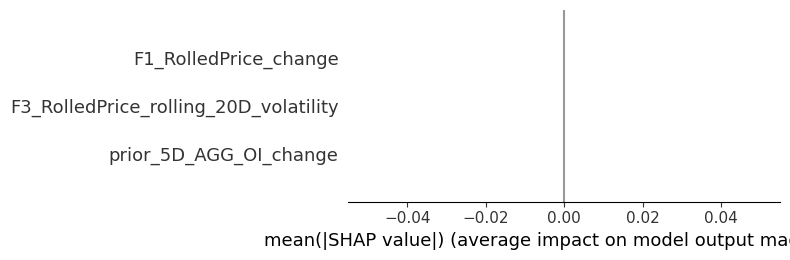

Response name: forward_report_CommercialLongPosition_change


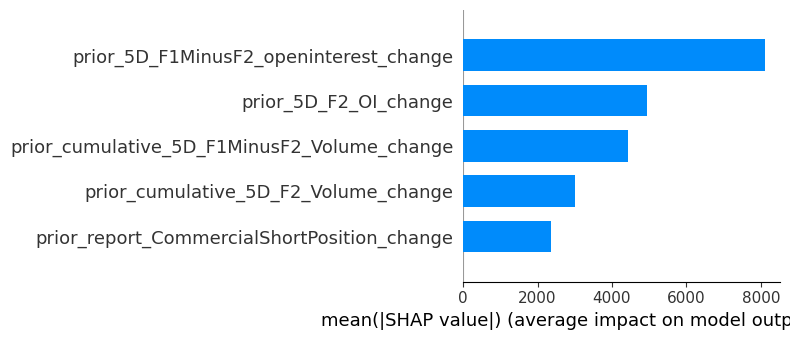

Response name: forward_report_CommercialShortPosition_change


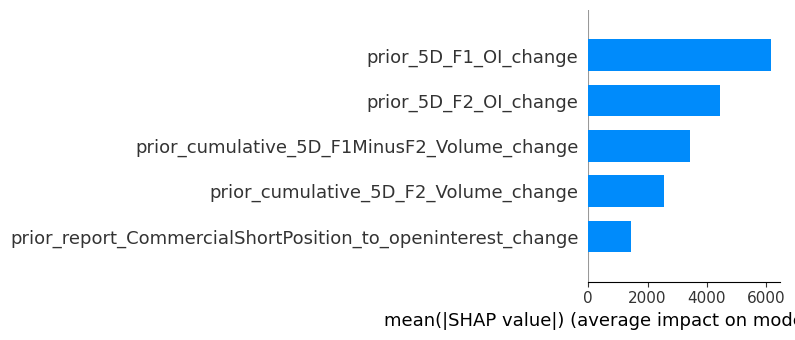

Response name: forward_Commercial_NetPosition_to_openinterest_change


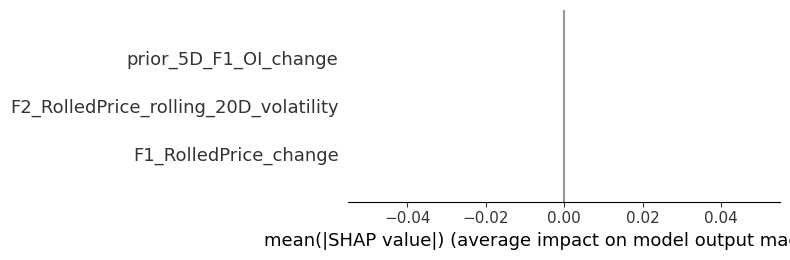

Response name: forward_CommercialLongPosition_to_openinterest_change


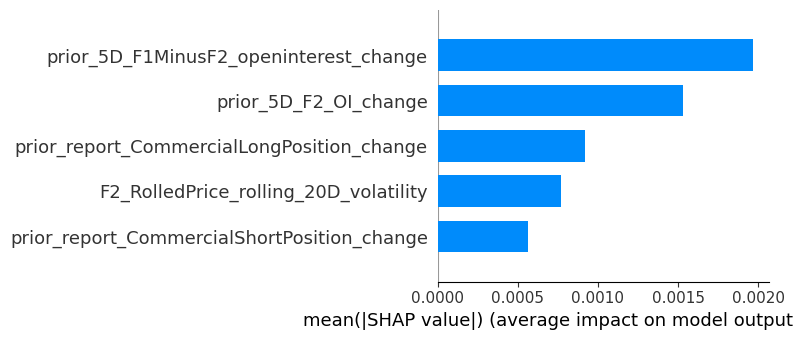

Response name: forward_CommercialShortPosition_to_openinterest_change


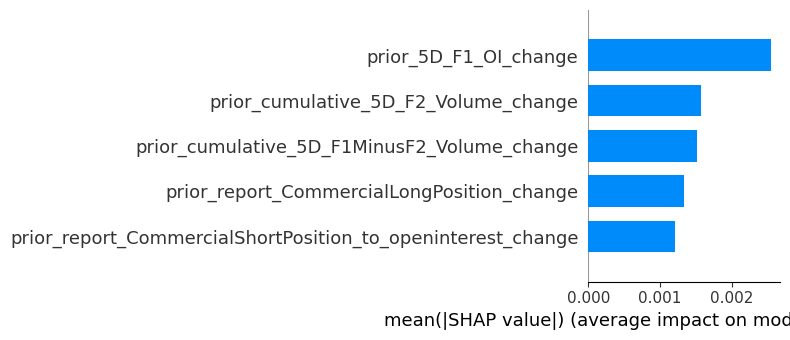

In [34]:
response_performance_map = {}
for response_name , model_info in final_selected_model_and_parameters_per_response.items():
    print(f'Response name: {response_name}')
    
    model_name = model_info['model_name']
    model_params = model_info['params']
    feature_names = selected_features_by_response[response_name]
    if model_name == "enet": 
        estimator = SGDRegressor(**model_params)
    elif model_name == "lasso": 
        estimator = Lasso(**model_params)
    elif model_name == "ols": 
        estimator = LinearRegression()
    elif model_name == "ridge": 
        estimator = Ridge(**model_params)
    elif  model_name == "rf": 
        estimator = RandomForestRegressor(**model_params)
    elif model_name == "extra":
        estimator = ExtraTreesRegressor(**model_params)
    elif model_name == "hgbm":
        estimator = HistGradientBoostingRegressor(**model_params)
        

    Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
    Xy.reset_index(drop=True, inplace= True)

    estimator.fit(Xy[feature_names], Xy[response_name]) 
    X_sample = dataset[feature_names].sample(n=100)
    if model_name in ["rf" , "extra","hgbm" ]:
        explainer = shap.TreeExplainer(estimator)
        shap_values = explainer.shap_values(X_sample)
    elif model_name in ["enet" , "lasso","ols" ]:
        explainer = shap.LinearExplainer(estimator, 
                                         dataset[feature_names].sample(50))
        shap_values = explainer.shap_values(dataset[feature_names].sample(100))
    shap.summary_plot(shap_values, 
                      X_sample, 
                      feature_names=feature_names, 
                      plot_type="bar")        



        
        